# Personal Loan Analysis
## Loan Status Prediction

This project analyzes a fairly large loan information dataset, the process will be divided in 4 stages: exploration, data handling, model training and evaluation. Throughout each step a brief explanation will be given with the thought process that leads every decision. The approach of this project focus in sorting the data and visually representatiing the information at every point with the objective of walking the reader in understanding the process and get their own insights hidden within the data and hopefully help the user to build an intuation filtering the most important features to determine the implicit risk in new clients's loans.

The Lending Club Loan Dataset contain complete loan data for all loans issued through the 2007-2018, including the current loan status (Current, Charged-off, Fully Paid, etc.) and latest payment information. The csv containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, and collections among others. The file is a matrix of about 39 thousand observations and 151 variables.

As an additional opportunity that will be exploting in this project is the use of Nvidia's GPU accelerator library Cuda which will help us reducing time required to train the model and handling the data.

Dataset source: https://www.kaggle.com/datasets/wordsforthewise/lending-club?select=accepted_2007_to_2018Q4.csv.gz

## Stage 1: Exploring the Dataset


### Dataset Description


|Index|Feature|Description|
|:----|:------|:----------|
|	1	|	acceptD	|	The date which the borrower accepted  the offer	|
|	2	|	accNowDelinq	|	The number of accounts on which the borrower is now delinquent.	|
|	3	|	accOpenPast24Mths	|	Number of trades opened in past 24 months.	|
|	4	|	addrState	|	The state provided by the borrower in the loan application	|
|	5	|	all_util	|	Balance to credit limit on all trades	|
|	6	|	annual_inc_joint	|	The combined self-reported annual income provided by the co-borrowers during registration	|
|	7	|	annualInc	|	The self-reported annual income provided by the borrower during registration.	|
|	8	|	application_type	|	Indicates whether the loan is an individual application or a joint application with two co-borrowers	|
|	9	|	avg_cur_bal	|	Average current balance of all accounts	|
|	10	|	bcOpenToBuy	|	Total open to buy on revolving bankcards.	|
|	11	|	bcUtil	|	Ratio of total current balance to high credit/credit limit for all bankcard accounts.	|
|	12	|	chargeoff_within_12_mths	|	Number of charge-offs within 12 months	|
|	13	|	collections_12_mths_ex_med	|	Number of collections in 12 months excluding medical collections	|
|	14	|	creditPullD	|	The date LC pulled credit for this loan	|
|	15	|	delinq2Yrs	|	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years	|
|	16	|	delinqAmnt	|	The past-due amount owed for the accounts on which the borrower is now delinquent.	|
|	17	|	desc	|	Loan description provided by the borrower	|
|	18	|	dti	|	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.	|
|	19	|	dti_joint	|	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income	|
|	20	|	earliestCrLine	|	The date the borrower's earliest reported credit line was opened	|
|	21	|	effective_int_rate	|	The effective interest rate is equal to the interest rate on a Note reduced by Lending Club's estimate of the impact of uncollected interest prior to charge off. 	|
|	22	|	emp_title	|	The job title supplied by the Borrower when applying for the loan.*	|
|	23	|	empLength	|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.	|
|	24	|	expD	|	The date the listing will expire	|
|	25	|	expDefaultRate	|	The expected default rate of the loan.	|
|	26	|	ficoRangeHigh	|	The upper boundary range the borrower’s FICO at loan origination belongs to.	|
|	27	|	ficoRangeLow	|	The lower boundary range the borrower’s FICO at loan origination belongs to.	|
|	28	|	fundedAmnt	|	The total amount committed to that loan at that point in time.	|
|	29	|	grade	|	LC assigned loan grade	|
|	30	|	homeOwnership	|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.	|
|	31	|	id	|	A unique LC assigned ID for the loan listing.	|
|	32	|	il_util	|	Ratio of total current balance to high credit/credit limit on all install acct	|
|	33	|	ils_exp_d	|	wholeloan platform expiration date	|
|	34	|	initialListStatus	|	The initial listing status of the loan. Possible values are – W, F	|
|	35	|	inq_fi	|	Number of personal finance inquiries	|
|	36	|	inq_last_12m	|	Number of credit inquiries in past 12 months	|
|	37	|	inqLast6Mths	|	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)	|
|	38	|	installment	|	The monthly payment owed by the borrower if the loan originates.	|
|	39	|	intRate	|	Interest Rate on the loan	|
|	40	|	isIncV	|	Indicates if income was verified by LC, not verified, or if the income source was verified	|
|	41	|	listD	|	The date which the borrower's application was listed on the platform.	|
|	42	|	loanAmnt	|	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.	|
|	43	|	max_bal_bc	|	Maximum current balance owed on all revolving accounts	|
|	44	|	memberId	|	A unique LC assigned Id for the borrower member.	|
|	45	|	mo_sin_old_rev_tl_op	|	Months since oldest revolving account opened	|
|	46	|	mo_sin_rcnt_rev_tl_op	|	Months since most recent revolving account opened	|
|	47	|	mo_sin_rcnt_tl	|	Months since most recent account opened	|
|	48	|	mortAcc	|	Number of mortgage accounts.	|
|	49	|	msa	|	Metropolitan Statistical Area of the borrower.	|
|	50	|	mths_since_last_major_derog	|	Months since most recent 90-day or worse rating	|
|	51	|	mths_since_oldest_il_open	|	Months since oldest bank installment account opened	|
|	52	|	mths_since_rcnt_il	|	Months since most recent installment accounts opened	|
|	53	|	mthsSinceLastDelinq	|	The number of months since the borrower's last delinquency.	|
|	54	|	mthsSinceLastRecord	|	The number of months since the last public record.	|
|	55	|	mthsSinceMostRecentInq	|	Months since most recent inquiry.	|
|	56	|	mthsSinceRecentBc	|	Months since most recent bankcard account opened.	|
|	57	|	mthsSinceRecentLoanDelinq	|	Months since most recent personal finance delinquency.	|
|	58	|	mthsSinceRecentRevolDelinq	|	Months since most recent revolving delinquency.	|
|	59	|	num_accts_ever_120_pd	|	Number of accounts ever 120 or more days past due	|
|	60	|	num_actv_bc_tl	|	Number of currently active bankcard accounts	|
|	61	|	num_actv_rev_tl	|	Number of currently active revolving trades	|
|	62	|	num_bc_sats	|	Number of satisfactory bankcard accounts	|
|	63	|	num_bc_tl	|	Number of bankcard accounts	|
|	64	|	num_il_tl	|	Number of installment accounts	|
|	65	|	num_op_rev_tl	|	Number of open revolving accounts	|
|	66	|	num_rev_accts	|	Number of revolving accounts	|
|	67	|	num_rev_tl_bal_gt_0	|	Number of revolving trades with balance >0	|
|	68	|	num_sats	|	Number of satisfactory accounts	|
|	69	|	num_tl_120dpd_2m	|	Number of accounts currently 120 days past due (updated in past 2 months)	|
|	70	|	num_tl_30dpd	|	Number of accounts currently 30 days past due (updated in past 2 months)	|
|	71	|	num_tl_90g_dpd_24m	|	Number of accounts 90 or more days past due in last 24 months	|
|	72	|	num_tl_op_past_12m	|	Number of accounts opened in past 12 months	|
|	73	|	open_acc_6m	|	Number of open trades in last 6 months	|
|	74	|	open_il_12m	|	Number of installment accounts opened in past 12 months	|
|	75	|	open_il_24m	|	Number of installment accounts opened in past 24 months	|
|	76	|	open_act_il	|	Number of currently active installment trades	|
|	77	|	open_rv_12m	|	Number of revolving trades opened in past 12 months	|
|	78	|	open_rv_24m	|	Number of revolving trades opened in past 24 months	|
|	79	|	openAcc	|	The number of open credit lines in the borrower's credit file.	|
|	80	|	pct_tl_nvr_dlq	|	Percent of trades never delinquent	|
|	81	|	percentBcGt75	|	Percentage of all bankcard accounts > 75% of limit.	|
|	82	|	pub_rec_bankruptcies	|	Number of public record bankruptcies	|
|	83	|	pubRec	|	Number of derogatory public records	|
|	84	|	purpose	|	A category provided by the borrower for the loan request. 	|
|	85	|	reviewStatus	|	The status of the loan during the listing period. Values: APPROVED, NOT_APPROVED.	|
|	86	|	reviewStatusD	|	The date the loan application was reviewed by LC	|
|	87	|	revolBal	|	Total credit revolving balance	|
|	88	|	revolUtil	|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.	|
|	89	|	serviceFeeRate	|	Service fee rate paid by the investor for this loan.	|
|	90	|	subGrade	|	LC assigned loan subgrade	|
|	91	|	tax_liens	|	Number of tax liens	|
|	92	|	term	|	The number of payments on the loan. Values are in months and can be either 36 or 60.	|
|	93	|	title	|	The loan title provided by the borrower	|
|	94	|	tot_coll_amt	|	Total collection amounts ever owed	|
|	95	|	tot_cur_bal	|	Total current balance of all accounts	|
|	96	|	tot_hi_cred_lim	|	Total high credit/credit limit	|
|	97	|	total_bal_il	|	Total current balance of all installment accounts	|
|	98	|	total_cu_tl	|	Number of finance trades	|
|	99	|	total_il_high_credit_limit	|	Total installment high credit/credit limit	|
|	100	|	total_rev_hi_lim	|	Total revolving high credit/credit limit	|
|	101	|	totalAcc	|	The total number of credit lines currently in the borrower's credit file	|
|	102	|	totalBalExMort	|	Total credit balance excluding mortgage	|
|	103	|	totalBcLimit	|	Total bankcard high credit/credit limit	|
|	104	|	url	|	URL for the LC page with listing data.	|
|	105	|	verified_status_joint	|	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified	|
|	106	|	zip_code	|	The first 3 numbers of the zip code provided by the borrower in the loan application.	|
|	107	|	revol_bal_joint	|	Sum of revolving credit balance of the co-borrowers, net of duplicate balances	|
|	108	|	sec_app_fico_range_low	|	FICO range (high) for the secondary applicant	|
|	109	|	sec_app_fico_range_high	|	FICO range (low) for the secondary applicant	|
|	110	|	sec_app_earliest_cr_line	|	Earliest credit line at time of application for the secondary applicant	|
|	111	|	sec_app_inq_last_6mths	|	Credit inquiries in the last 6 months at time of application for the secondary applicant	|
|	112	|	sec_app_mort_acc	|	Number of mortgage accounts at time of application for the secondary applicant	|
|	113	|	sec_app_open_acc	|	Number of open trades at time of application for the secondary applicant	|
|	114	|	sec_app_revol_util	|	Ratio of total current balance to high credit/credit limit for all revolving accounts	|
|	115	|	sec_app_open_act_il	|	Number of currently active installment trades at time of application for the secondary applicant	|
|	116	|	sec_app_num_rev_accts	|	Number of revolving accounts at time of application for the secondary applicant	|
|	117	|	sec_app_chargeoff_within_12_mths	|	Number of charge-offs within last 12 months at time of application for the secondary applicant	|
|	118	|	sec_app_collections_12_mths_ex_med	|	Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant	|
|	119	|	sec_app_mths_since_last_major_derog	|	Months since most recent 90-day or worse rating at time of application for the secondary applicant	|
|	120	|	disbursement_method	|	The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY	|

In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


device = "cuda" if torch.cuda.is_available() else "cpu"
print('Selected Device:', device)

Selected Device: cuda


In [37]:
files = ['./Datasets/' + file for file in os.listdir('./Datasets/')]

#Loan_DataSet = pd.DataFrame.empty

for i,file in enumerate(files):
    if i == 0:
        Loan_DataSet = pd.read_csv(file, low_memory=False)
    else:
        dataset_file = pd.read_csv(file, low_memory=False)
        Loan_DataSet = pd.concat([Loan_DataSet, dataset_file], ignore_index=True)
#Loan_DataSet = pd.concat(map(pd.read_csv, files, low_memory=False), ignore_index=True)

In [38]:
print("Number of columns",len(Loan_DataSet.columns))
print("Number of rows",len(Loan_DataSet.index))

Number of columns 151
Number of rows 2260699


In [39]:
Loan_DataSet.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,35703781,35176691,35653814,35873424,35793492,35803683,35673783,35713853,35673753,35916249
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,14075.0,8500.0,11200.0,23975.0,22475.0,3500.0,10450.0,6000.0,35000.0,10475.0
funded_amnt,14075.0,8500.0,11200.0,23975.0,22475.0,3500.0,10450.0,6000.0,35000.0,10475.0
funded_amnt_inv,14075.0,8500.0,11200.0,23975.0,22475.0,3500.0,10450.0,6000.0,35000.0,10475.0
...,...,...,...,...,...,...,...,...,...,...
settlement_status,NaN,NaN,NaN,NaN,NaN,NaN,BROKEN,NaN,NaN,NaN
settlement_date,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2016,NaN,NaN,NaN
settlement_amount,NaN,NaN,NaN,NaN,NaN,NaN,4476.0,NaN,NaN,NaN
settlement_percentage,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN


In [40]:
print(Loan_DataSet.select_dtypes(include='number').columns)
print("="*33+'\n'+"Number of numeric columns:", len(Loan_DataSet.select_dtypes(include='number').columns))

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       ...
       'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=113)
Number of numeric columns: 113


In [27]:
print(Loan_DataSet.select_dtypes(include='object').columns)
print("="*33+'\n'+"Number of non numeric columns:", len(Loan_DataSet.select_dtypes(include='object').columns))

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')
Number of non numeric columns: 38


In [41]:
total_rows = Loan_DataSet.shape[0]
null_info_dict = {}
for col in Loan_DataSet.columns:
    null_count = pd.isnull(Loan_DataSet[col]).sum()
    percent_null_values = 100*null_count/total_rows
    null_info_dict[col] = null_count
null_info_dict = dict(sorted(null_info_dict.items(), key=lambda item: item[1],  reverse=True))


print("{:<8} {:<45} {:<12} {:<12} {:<10} ".format('Index','Column_name', 'Dtype', 'Null Values', 'Percent'))
for i, k in enumerate(null_info_dict.keys()):
    print("{:<8} {:<45} {:<12} {:<12} {:<10} ".format(i+1, k, str(Loan_DataSet.dtypes[k]), null_info_dict[k], str(round(100*null_info_dict[k]/total_rows, 3))+'%'))

Index    Column_name                                   Dtype        Null Values  Percent    
1        member_id                                     float64      2260699      100.0%     
2        orig_projected_additional_accrued_interest    float64      2252048      99.617%    
3        hardship_type                                 object       2249782      99.517%    
4        hardship_reason                               object       2249782      99.517%    
5        hardship_status                               object       2249782      99.517%    
6        deferral_term                                 float64      2249782      99.517%    
7        hardship_amount                               float64      2249782      99.517%    
8        hardship_start_date                           object       2249782      99.517%    
9        hardship_end_date                             object       2249782      99.517%    
10       payment_plan_start_date                       object       22

In [42]:
NotNull_list = [x for x in null_info_dict.keys() if null_info_dict[x] != total_rows]
print(NotNull_list)
print("="*33+'\n'+"Number of valid features:", len(NotNull_list))

['orig_projected_additional_accrued_interest', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_del

In [43]:
Dataset_NotNull_Col = Loan_DataSet[NotNull_list]
print("Number of numeric columns:", len(Dataset_NotNull_Col.select_dtypes(include='number').columns))
print("Number of non numeric columns:", len(Dataset_NotNull_Col.select_dtypes(include='object').columns))

Number of numeric columns: 112
Number of non numeric columns: 38


Text(0.5, 1.0, 'Loan Status Distribution')

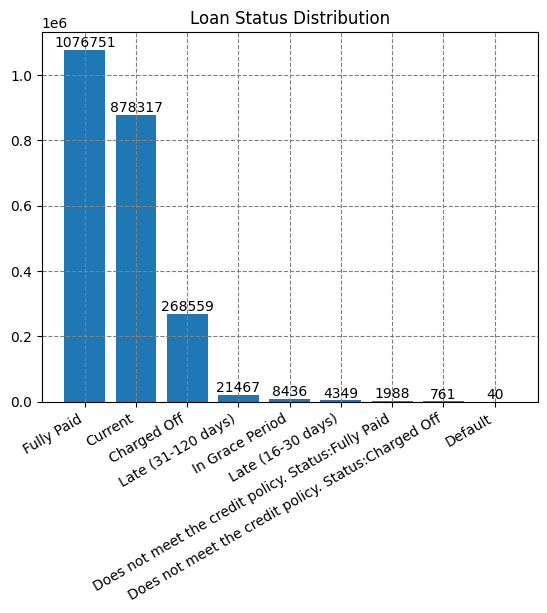

In [44]:
fig, ax = plt.subplots()
max_bar = 15
keys_list = Dataset_NotNull_Col.value_counts('loan_status').keys()
keys_list = [str(x) for x in keys_list]
keys_list = keys_list[:min(max_bar, len(keys_list))]
val_list = Dataset_NotNull_Col.value_counts('loan_status').to_list()
val_list = val_list[:min(max_bar, len(val_list))]
barplot = plt.bar(keys_list, val_list)

bars = ax.patches
labels = val_list
for bar, label in zip(bars, labels): 
    height = bar.get_height() 
    ax.text(bar.get_x() + bar.get_width() / 2, height+0.01, label, ha='center', va='bottom')  


ax.grid(color='gray', linestyle='dashed')
plt.xticks(rotation=30, ha='right')
plt.title('Loan Status Distribution')